# Inferential Statistics Assignment
## ~ Upward Mobility in South Berkeley ~ 

### Date: July/2021

### Author: Kazutoki Matsui
##### (Discussed with Vrashabh, Jose, Rita, and Sam at a high level)

## Part I

### Q1: Upward Mobility: All Income and Race
<br>
<font size="3">
    
  In this assignment, I will look at South Berkeley area, since I am an international student. 
    
  Looking at the Atlas map, South Berkeley have around average mobility for Black and White people, but less than the state and national average for Hispenic population. Also I noticed that Hispanic people have higher rate of incarceration at 6.3% than the national average.</font>
<h3><center>(Exhibit1) Tract 06001424001, South Berkeley, Berkeley, CA<br>Low Income Households, All Race and Gender</h3>

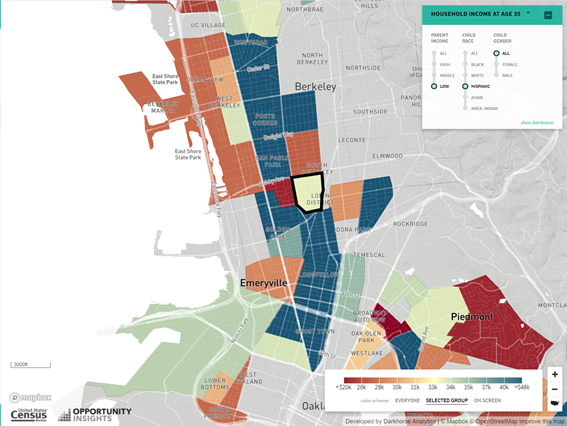
    
### <h3><center>(Exhibit2) Low Income Households, Hispanic and pooled_Gender<br>Hispanic people have significantly lower income than the national average.</h3>
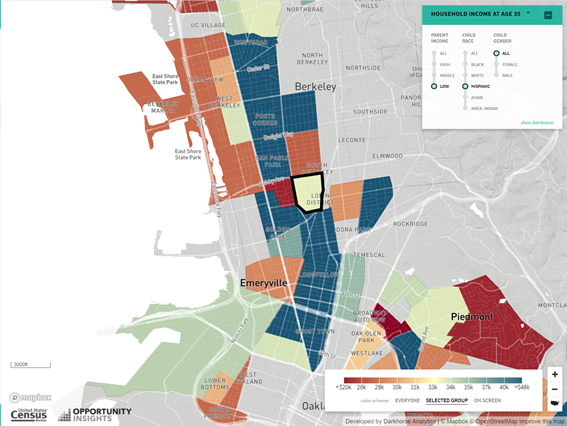
    

In [1]:
## import several packages
import pandas as pd
import numpy as np
from statsmodels import api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Read the dataset and look at the first few observations
df = pd.read_stata('atlas.dta')
df.head()

,tract,county,state,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,...,kfr_white_female_p25,kfr_black_male_p25,kfr_hisp_male_p25,kfr_white_male_p25,jail_black_female_p25,jail_hisp_female_p25,jail_white_female_p25,jail_black_male_p25,jail_hisp_male_p25,jail_white_male_p25
0,100,1.0,11.0,11304.0,Washington DC,181251.171875,23.717501,0.890885,0.834425,0.209448,...,0.452178,NaN,NaN,0.331660,NaN,NaN,0.792653,NaN,NaN,0.128962
1,100,1.0,16.0,35801.0,Boise City,41690.359375,19.209747,0.399332,0.227058,0.063636,...,0.475316,NaN,NaN,0.413408,NaN,NaN,0.004414,NaN,NaN,0.078174
2,100,1.0,17.0,25000.0,Quincy,57646.042969,13.140914,0.241259,0.110831,0.013127,...,0.433489,NaN,NaN,0.552839,NaN,NaN,-0.014769,NaN,NaN,0.011819
3,100,1.0,24.0,17501.0,Cumberland,59276.480469,37.074139,0.109272,0.084211,0.018502,...,0.431075,NaN,NaN,0.466880,NaN,NaN,-0.017347,NaN,NaN,0.017731
4,100,1.0,26.0,12401.0,Alpena,60438.738281,27.445484,0.144712,0.152008,0.015143,...,0.431148,NaN,NaN,0.407559,NaN,NaN,0.010725,NaN,NaN,0.009615


In [3]:
## Check the columns names
df.columns

Index(['tract', 'county', 'state', 'cz', 'czname', 'hhinc_mean2000',
       'mean_commutetime2000', 'frac_coll_plus2010', 'frac_coll_plus2000',
       'foreign_share2010', 'med_hhinc2016', 'med_hhinc1990', 'popdensity2000',
       'poor_share2010', 'poor_share2000', 'poor_share1990', 'share_black2010',
       'share_hisp2010', 'share_asian2010', 'share_black2000',
       'share_white2000', 'share_hisp2000', 'share_asian2000',
       'gsmn_math_g3_2013', 'rent_twobed2015', 'singleparent_share2010',
       'singleparent_share1990', 'singleparent_share2000', 'traveltime15_2010',
       'emp2000', 'mail_return_rate2010', 'ln_wage_growth_hs_grad',
       'jobs_total_5mi_2015', 'jobs_highpay_5mi_2015', 'nonwhite_share2010',
       'popdensity2010', 'ann_avg_job_growth_2004_2013', 'job_density_2013',
       'kfr_pooled_pooled_p25', 'jail_pooled_pooled_p25',
       'kfr_black_pooled_p25', 'kfr_hisp_pooled_p25', 'kfr_white_pooled_p25',
       'jail_black_pooled_p25', 'jail_hisp_pooled_p25',
   

### Q2: Hypothesis on the Mobility in Berkeley
<font size="3">White and Asian people in Bay Area are generally upper class households. Race could matter. Also. household environment such as single-parent could affect the future income, since the households have lower chance of sending their children to college. Or even in worse cases, the children might commit a crime and get incarcerated, which could lead to umemployment in the future.
    
So my hypothesis to analyze is:
1. Race of their parents, especially non-white families
2. Single parent households
    
matter when predicting the income in the adulthood.
</font>
</font>

### Q3: Average upward mobility estimates
<font size="3">The variable ['kfr_pooled_pooled_p25'] measures the average income rank in adulthood for children who grew up in a given tract and whose parents are at the 25th percentile of the national income distribution. 

As we look at the summary statistics below, the varialbe can go negative and over 1.00. This is because they are just estimates, and it is estimated using a sample observations and not the entire population. Since the estimate is based on a sample, a statistical model is used to estimate the statistic.
    
The researchers added "independent, normally distributed noise to each of these estimates" to maintain privacy of the source individuals. The authors take care of this issues because some tracts have very few sample observations and the privacy of the individuals should be protected when constructing publicly available statistics. As a result, depending on the standard errors, the estimate does not necessarily add up to 100%, and sometimes could include values outside 0 to 1.</font>

In [4]:
## Check the summary statistic of 'kfr_pooled_pooled_p25'
df['kfr_pooled_pooled_p25'].describe()

count    72014.000000
mean         0.428584
std          0.071272
min         -0.032857
25%          0.380702
50%          0.425209
75%          0.473510
max          1.033489
Name: kfr_pooled_pooled_p25, dtype: float64

In [21]:
# Since State and County codes are recognized as numeric, I omitted their first zeros in each factor. 
'''Parameters'''
tract_number = '06001424001'
State = 'CA'
County = 'Berkeley'
Tract = 'South Berkeley'
state = 6
county = 1
tract = 424001
'''Parameters'''
    
tr = df[(df['state']==state) & (df['county']==county) & (df['tract']==tract)]
tr

,tract,county,state,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,...,kfr_white_female_p25,kfr_black_male_p25,kfr_hisp_male_p25,kfr_white_male_p25,jail_black_female_p25,jail_hisp_female_p25,jail_white_female_p25,jail_black_male_p25,jail_hisp_male_p25,jail_white_male_p25
54202,424001,1.0,6.0,37800.0,San Francisco,62616.777344,29.238644,0.378324,0.287918,0.224063,...,NaN,0.351575,0.358575,NaN,-0.015246,-0.025701,NaN,0.03896,0.063063,NaN


### Q4: Average upward mobility [kfr_pooled_pooled_p25] in Fillmore, compared to CA state and US.

<font size="3">The average of mobility in fillmore is lower than state and national average, meaning that overall chance of "climing" the ladder is lower than other regions. </font>

In [23]:
## 'kfr_pooled_pooled_p25' in Fillmore
tr_average = tr['kfr_pooled_pooled_p25'].item()
## County Average
ct_average = df[(df['state']==state) & (df['county']==county)]['kfr_pooled_pooled_p25'].mean()
## State Average of 'kfr_pooled_pooled_p25'
st_average = df[df['state']==state]['kfr_pooled_pooled_p25'].mean()
## US Average
us_average = df['kfr_pooled_pooled_p25'].mean()

print(f'The average upward of mobility in {Tract} is {tr_average}')
print(f'The average upward of mobility in {County} is {ct_average}')
print(f'The average upward of mobility in {State} is {st_average}')
print(f'The average upward of mobility in US is {us_average}')

The average upward of mobility in South Berkeley is 0.3623846769332886
The average upward of mobility in Berkeley is 0.4627452492713928
The average upward of mobility in CA is 0.4481094777584076
The average upward of mobility in US is 0.42858389019966125


### Q5 Standard Deviation of Upward Mobility, ['kfr_pooled_pooled_p25']

<font size="3">Berkeley has higher variation in the mobility than CA state average, but it is around the national average.</font>

In [7]:
tr_std = df[(df['state']==state) & (df['county']==county)]['kfr_pooled_pooled_p25'].std()
st_std = df[df['state']==state]['kfr_pooled_pooled_p25'].std()
us_std = df['kfr_pooled_pooled_p25'].std()

print(f'The Standard Deviation of upward of mobility in {County} is {tr_std}')
print(f'The Standard Deviation of upward of mobility in {State} is {st_std}')
print(f'The Standard Deviation of upward of mobility in US is {us_std}')

The Standard Deviation of upward of mobility in Berkeley is 0.07252701371908188
The Standard Deviation of upward of mobility in CA is 0.05961908400058746
The Standard Deviation of upward of mobility in US is 0.07127182930707932


### Q6 Histram of 'kfr_pooled_pooled_p25' in County 

<font size="3">The distribution is centered around roughly the mean 0.35, but it has smaller tail on the right hand side, meaning that it is right-skewed.<font>

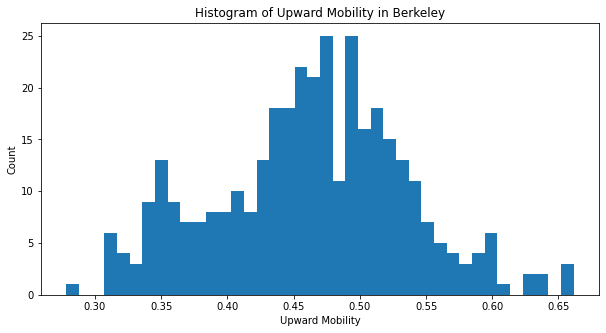

In [8]:
plt.figure(figsize=(10, 5))
X = df[(df['state']==state) & (df['county']==county)]['kfr_pooled_pooled_p25']
plt.hist(X, bins=40) 
plt.title(f"Histogram of Upward Mobility in {County}")
plt.xlabel('Upward Mobility')
plt.ylabel('Count')
plt.show()

### Q7: Average Mobility by Race

<font size="3">The comparison of the average between tract, state, and national shows that South Berkeley have around average mobility for Black and White people, but less than the state and national average for Hispenic population. 

On the other hand, the standard deviations of mobility in South Berkeley are higher for White population, but for Black and Hispanic people, they are roughly the same as the national average.</font>

In [25]:
## Tract Average by Race
tr_baverage = tr['kfr_black_pooled_p25'].item()
tr_haverage = tr['kfr_hisp_pooled_p25'].item()
tr_waverage = tr['kfr_white_pooled_p25'].item()
## County Average by Race
ct_baverage = df[(df['state']==state) & (df['county']==county)]['kfr_black_pooled_p25'].mean()
ct_haverage = df[(df['state']==state) & (df['county']==county)]['kfr_hisp_pooled_p25'].mean()
ct_waverage = df[(df['state']==state) & (df['county']==county)]['kfr_white_pooled_p25'].mean()
## State Average by Race
st_baverage = df[df['state']==state]['kfr_black_pooled_p25'].mean()
st_haverage = df[df['state']==state]['kfr_hisp_pooled_p25'].mean()
st_waverage = df[df['state']==state]['kfr_white_pooled_p25'].mean()
## US Average by Race
us_baverage = df['kfr_black_pooled_p25'].mean()
us_haverage = df['kfr_hisp_pooled_p25'].mean()
us_waverage = df['kfr_white_pooled_p25'].mean()

print(f" ## {Tract} Average by Race")
print(f'The average upward of mobility for Black people in {Tract} is {tr_baverage}')
print(f'The average upward of mobility for Hispanic people in {Tract} is {tr_haverage}')
print(f'The average upward of mobility for White people in {Tract} is {tr_waverage}')
print(f"\n ## {County} County Average by Race")
print(f'The average upward of mobility for Black people in {County} is {ct_baverage}')
print(f'The average upward of mobility for Hispanic people in {County} is {ct_haverage}')
print(f'The average upward of mobility for White people in {County} is {ct_waverage}')
print(f"\n ## {State} State Average by Race")
print(f'The average upward of mobility for Black people in {State} is {st_baverage}')
print(f'The average upward of mobility for Hispanic people in{State} is {st_haverage}')
print(f'The average upward of mobility for White people in {State} is {st_waverage}')
print("\n ## US Average by Race")
print(f'The average upward of mobility for Black peoplein US is {us_baverage}')
print(f'The average upward of mobility for Hispanic people in US is {us_haverage}')
print(f'The average upward of mobility for White people in US is {us_waverage}')

 ## South Berkeley Average by Race
The average upward of mobility for Black people in South Berkeley is 0.31633296608924866
The average upward of mobility for Hispanic people in South Berkeley is 0.33002302050590515
The average upward of mobility for White people in South Berkeley is 0.46390777826309204

 ## Berkeley County Average by Race
The average upward of mobility for Black people in Berkeley is 0.3449966013431549
The average upward of mobility for Hispanic people in Berkeley is 0.46579375863075256
The average upward of mobility for White people in Berkeley is 0.4879814386367798

 ## CA State Average by Race
The average upward of mobility for Black people in CA is 0.3404766321182251
The average upward of mobility for Hispanic people inCA is 0.45066311955451965
The average upward of mobility for White people in CA is 0.47619640827178955

 ## US Average by Race
The average upward of mobility for Black peoplein US is 0.33987247943878174
The average upward of mobility for Hispanic pe

### Standard Deviation by Race

<font size="3">The comparison of mobility in volatility shows that Black and Hispanic population are around the national average, while white people have higher mobility than the nation as a whole.

In [10]:
## County Std by Race
tr_bstd = df[(df['state']==state) & (df['county']==county)]['kfr_black_pooled_p25'].std()
tr_hstd = df[(df['state']==state) & (df['county']==county)]['kfr_hisp_pooled_p25'].std()
tr_wstd = df[(df['state']==state) & (df['county']==county)]['kfr_white_pooled_p25'].std()

## State Std by Race
st_bstd = df[df['state']==state]['kfr_black_pooled_p25'].std()
st_hstd = df[df['state']==state]['kfr_hisp_pooled_p25'].std()
st_wstd = df[df['state']==state]['kfr_white_pooled_p25'].std()
## US Std by Race
us_bstd = df['kfr_black_pooled_p25'].std()
us_hstd = df['kfr_hisp_pooled_p25'].std()
us_wstd = df['kfr_white_pooled_p25'].std()

print(f" ## {Tract} Standard Deviation by Race")
print(f'The Standard Deviation of upward of mobility for Black people in {County} is {tr_bstd}')
print(f'The Standard Deviation of upward of mobility for Hispanic people in {County} is {tr_hstd}')
print(f'The Standard Deviation of upward of mobility for White people in {County} is {tr_wstd}')
print(f"\n ## {State} State Standard Deviation by Race")
print(f'The Standard Deviation of upward of mobility for Black people in {State} is {st_bstd}')
print(f'The Standard Deviation of upward of mobility for Hispanic people in {State} is {st_hstd}')
print(f'The Standard Deviation of upward of mobility for White people in {State} is {st_wstd}')
print("\n ## US Standard Deviation by Race")
print(f'The Standard Deviation of upward of mobility for Black peoplein US is {us_bstd}')
print(f'The Standard Deviation of upward of mobility for Hispanic people in US is {us_hstd}')
print(f'The Standard Deviation of upward of mobility for White people in US is {us_wstd}')

 ## South Berkeley Standard Deviation by Race
The Standard Deviation of upward of mobility for Black people in Berkeley is 0.06482192873954773
The Standard Deviation of upward of mobility for Hispanic people in Berkeley is 0.07798772305250168
The Standard Deviation of upward of mobility for White people in Berkeley is 0.08680001646280289

 ## CA State Standard Deviation by Race
The Standard Deviation of upward of mobility for Black people in CA is 0.0686379000544548
The Standard Deviation of upward of mobility for Hispanic people in CA is 0.062016669660806656
The Standard Deviation of upward of mobility for White people in CA is 0.07125125080347061

 ## US Standard Deviation by Race
The Standard Deviation of upward of mobility for Black peoplein US is 0.06438308209180832
The Standard Deviation of upward of mobility for Hispanic people in US is 0.07907655090093613
The Standard Deviation of upward of mobility for White people in US is 0.07200063765048981


### Histogram by Race

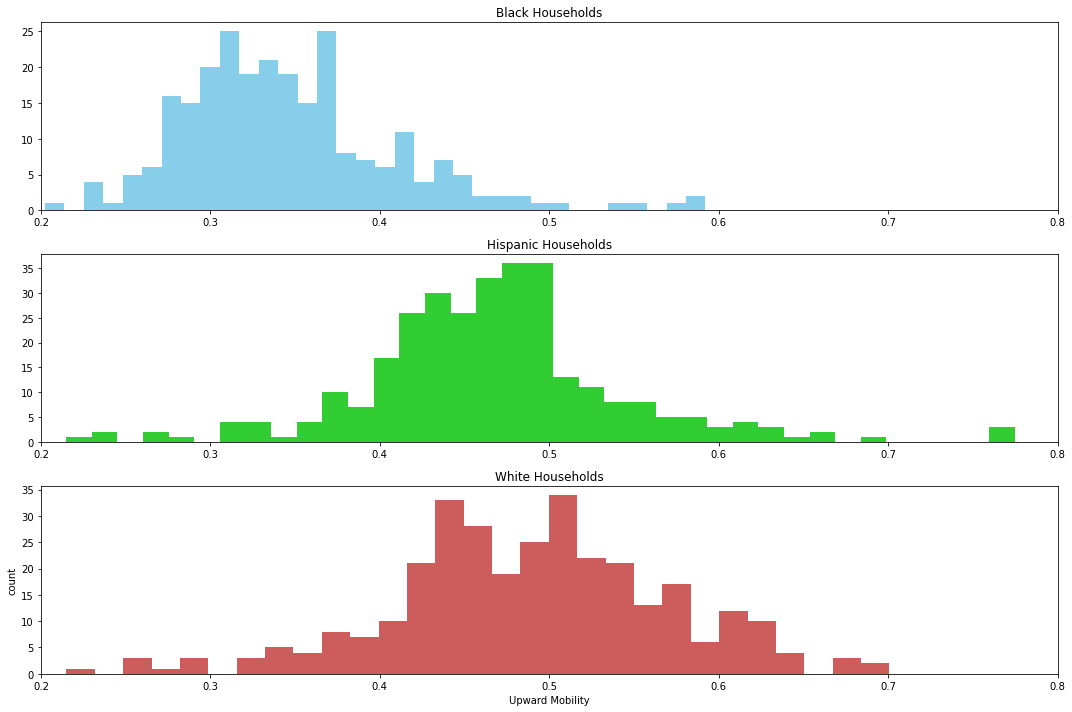

In [11]:
x = df[(df['state']==state) & (df['county']==county)]
fig, axs = plt.subplots(3,figsize=(15,10))
axs[0].set_title('Black Households')
axs[0].set_xlim([0.2,0.8])
axs[1].set_title('Hispanic Households')
axs[1].set_xlim([0.2,0.8])
axs[2].set_title('White Households')
axs[2].set_xlim([0.2,0.8])
axs[0].hist(x['kfr_black_pooled_p25'], bins=40, color = "skyblue")
axs[1].hist(x['kfr_hisp_pooled_p25'], bins=40, color = "limegreen")
axs[2].hist(x['kfr_white_pooled_p25'], bins=40, color = "indianred")
axs[2].set(ylabel='count')
axs[2].set(xlabel='Upward Mobility')
fig.tight_layout()

plt.show()

### Q8 Correlation Matrix of Mobility in County 

<font size="3"> I checked with all the combination of the variables with 'kfr_pooled_pooled_p25', and sort them in ascending order. Considering that the target population is 30s in their life, I assumed we should focus on 2000, when they are growing up as a child and are affected by the surrounding environments.

In [12]:
## To see the correlation of the variables, take a look at the correlation matrix
df_county = df[(df['state']==state) & (df['county']==county)]
columns =['kfr_pooled_pooled_p25','hhinc_mean2000',
       'mean_commutetime2000', 'frac_coll_plus2010', 'frac_coll_plus2000',
       'foreign_share2010', 'med_hhinc2016', 'med_hhinc1990', 'popdensity2000',
       'poor_share2010', 'poor_share2000', 'poor_share1990', 'share_black2010',
       'share_hisp2010', 'share_asian2010', 'share_black2000',
       'share_white2000', 'share_hisp2000', 'share_asian2000',
        'rent_twobed2015', 'singleparent_share2010',
       'singleparent_share1990', 'singleparent_share2000', 'traveltime15_2010',
       'emp2000', 'mail_return_rate2010', 'ln_wage_growth_hs_grad',
       'jobs_total_5mi_2015', 'jobs_highpay_5mi_2015', 'nonwhite_share2010',
       'popdensity2010', 'ann_avg_job_growth_2004_2013', 'job_density_2013',
        'jail_pooled_pooled_p25',
       'kfr_black_pooled_p25', 'kfr_hisp_pooled_p25', 'kfr_white_pooled_p25',
       'jail_black_pooled_p25', 'jail_hisp_pooled_p25',
       'jail_white_pooled_p25', 'kfr_pooled_female_p25', 'kfr_pooled_male_p25',
       'jail_pooled_female_p25', 'jail_pooled_male_p25',
       'kfr_black_female_p25', 'kfr_hisp_female_p25', 'kfr_white_female_p25',
       'kfr_black_male_p25', 'kfr_hisp_male_p25', 'kfr_white_male_p25',
       'jail_black_female_p25', 'jail_hisp_female_p25',
       'jail_white_female_p25', 'jail_black_male_p25', 'jail_hisp_male_p25',
       'jail_white_male_p25']
df_county = df_county[columns]
df_county.corr(method= 'pearson').sort_values('kfr_pooled_pooled_p25')
## Look at the first column to see the correlations with 'kfr_pooled_pooled_p25'. Correlations are sorted by ascending order.

,kfr_pooled_pooled_p25,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,med_hhinc2016,med_hhinc1990,popdensity2000,poor_share2010,...,kfr_white_female_p25,kfr_black_male_p25,kfr_hisp_male_p25,kfr_white_male_p25,jail_black_female_p25,jail_hisp_female_p25,jail_white_female_p25,jail_black_male_p25,jail_hisp_male_p25,jail_white_male_p25
singleparent_share2000,-0.747630,-0.774983,-0.105647,-0.383099,-0.409295,-0.149418,-0.712230,-0.784367,0.472446,0.615239,...,-0.345393,-0.308661,-0.094899,-0.145500,0.096662,-0.144082,-0.053202,-0.023502,-0.119749,-0.075868
share_black2000,-0.740684,-0.540469,0.072666,-0.365587,-0.401236,-0.177205,-0.517207,-0.578538,0.295764,0.480060,...,-0.193397,-0.269265,-0.099328,-0.112346,0.082490,-0.087907,0.004211,0.003908,-0.030520,-0.148020
share_black2010,-0.729943,-0.542552,0.079267,-0.397284,-0.416746,-0.183432,-0.546048,-0.578450,0.281600,0.460712,...,-0.231323,-0.239177,-0.089759,-0.139807,0.096858,-0.081596,-0.019128,0.005060,-0.057078,-0.124961
singleparent_share1990,-0.690708,-0.711229,-0.057610,-0.368831,-0.374716,-0.065687,-0.684894,-0.761947,0.487719,0.612570,...,-0.330077,-0.306765,-0.087243,-0.118569,0.128247,-0.163122,-0.055461,0.021747,-0.094181,-0.092736
singleparent_share2010,-0.598280,-0.641894,-0.099527,-0.432973,-0.440917,-0.047141,-0.671809,-0.689258,0.474611,0.614894,...,-0.397677,-0.295323,-0.046257,-0.238340,0.042293,-0.037313,-0.074102,0.015357,-0.137933,0.051289
poor_share1990,-0.552173,-0.693442,-0.163556,-0.325695,-0.324455,0.054952,-0.614257,-0.762910,0.536200,0.800358,...,-0.383623,-0.289181,-0.082017,-0.033599,0.146013,-0.146763,-0.113717,0.023550,-0.113700,-0.057024
poor_share2000,-0.521729,-0.706563,-0.198618,-0.308628,-0.301807,0.083729,-0.622393,-0.734103,0.535673,0.826054,...,-0.318812,-0.307986,-0.080968,-0.088504,0.165307,-0.133557,-0.161959,0.029073,-0.102391,-0.075302
poor_share2010,-0.478351,-0.665083,-0.154291,-0.389626,-0.351582,0.132225,-0.592943,-0.668883,0.515133,1.000000,...,-0.371200,-0.309736,-0.051324,-0.161601,0.134126,-0.089690,-0.055463,0.058049,-0.142884,0.033688
share_hisp2010,-0.369393,-0.446502,-0.034465,-0.771673,-0.717027,0.305146,-0.501116,-0.382091,0.237690,0.335505,...,-0.438362,-0.191749,0.005155,-0.257014,-0.055235,-0.055152,0.063867,0.073620,0.044503,0.089475
jail_pooled_male_p25,-0.337470,-0.313151,0.000666,-0.273770,-0.272865,-0.005079,-0.298387,-0.312245,0.143291,0.275194,...,-0.112873,-0.164241,-0.100872,-0.205645,0.089430,-0.077251,-0.125405,0.381956,0.169714,0.135115


In [15]:
columns_r =['kfr_pooled_pooled_p25','singleparent_share2000','share_asian2000', 'share_hisp2000','share_black2000']
df_county_r = df_county[columns_r]
df_county_r.corr(method= 'pearson').sort_values('kfr_pooled_pooled_p25', ascending = False)

,kfr_pooled_pooled_p25,singleparent_share2000,share_asian2000,share_hisp2000,share_black2000
kfr_pooled_pooled_p25,1.000000,-0.747630,0.543276,-0.325358,-0.740684
share_asian2000,0.543276,-0.356903,1.000000,-0.222914,-0.355046
share_hisp2000,-0.325358,0.195815,-0.222914,1.000000,0.125823
share_black2000,-0.740684,0.815518,-0.355046,0.125823,1.000000
singleparent_share2000,-0.747630,1.000000,-0.356903,0.195815,0.815518


### Q9 Scatter matrix of some of the variables

<font size="3">Created the scatter matrix below, ['kfr_pooled_pooled_p25','singleparent_share2000', 'singleparent_share1990','share_black2010','poor_share1990', 'poor_share2000', 'share_asian2010','foreign_share2010','mean_commutetime2000'] </font>

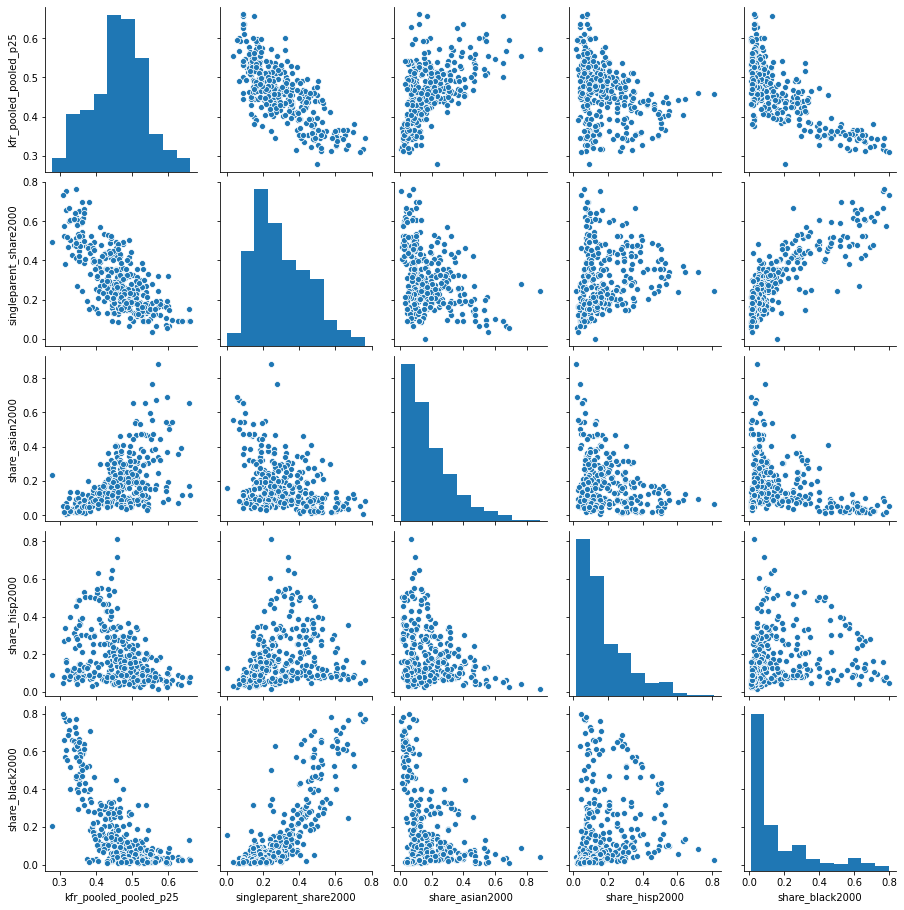

In [16]:
import seaborn as sns

sns.pairplot(df_county_r)
plt.show()
## Look at the first column to see the correlations with 'kfr_pooled_pooled_p25'. Correlations are sorted by descending order.

### Q10 Non-Linear Relationship
<font size="3">All the variables ['singleparent_share2000','share_asian2000', 'nonwhite_share2010'] seems to have some non-linear relationship from the scatter plots above. I took the log of X variables and regressed against 'kfr_pooled_pooled_p25' and got them all statistically significant, meaning that they indeed have non-linear relationships.</font>

In [17]:
## take log of X variables
df_county = df[(df['state']==state) & (df['county']==county)]
df_county = df_county[columns]
df_county_log = df_county
df_county_log[columns_r[1:]] = df_county_log[columns_r[1:]].apply(lambda x: np.log(x), axis= 1)
df_county_log[columns_r].head()

C:\Users\81801\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,kfr_pooled_pooled_p25,singleparent_share2000,share_asian2000,share_hisp2000,share_black2000
52656,0.462130,-2.074622,-2.238571,-3.248535,-2.994932
52673,0.585468,-1.785789,-2.564070,-2.792685,-3.292179
52687,0.418985,-1.263333,-2.711976,-2.743098,-1.848701
52700,0.383909,-1.106425,-2.776902,-2.720148,-1.696176
52714,0.353754,-0.802631,-3.075006,-2.240065,-0.814603


In [18]:
## Y = a + b1*ln(X1) + b2*ln(X2) + b3*ln(X3)
model = smf.ols(formula= 'kfr_pooled_pooled_p25 ~ singleparent_share2000 + share_asian2000 +share_hisp2000 + share_black2000', data=df_county_log)
results_log = model.fit()

print(results_log.summary())

                              OLS Regression Results                             
Dep. Variable:     kfr_pooled_pooled_p25   R-squared:                       0.698
Model:                               OLS   Adj. R-squared:                  0.694
Method:                    Least Squares   F-statistic:                     202.7
Date:                   Sun, 18 Jul 2021   Prob (F-statistic):           7.50e-90
Time:                           17:08:59   Log-Likelihood:                 642.46
No. Observations:                    356   AIC:                            -1275.
Df Residuals:                        351   BIC:                            -1256.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

## Part II

### Q11: Hypothesis Testing


<font size="3">All the variables being born in a black neiborhood does matter for the future income, reducing the income rank by 2%. While hispanic variable is also significant, the effect seems very small, meaning share of hispanic people does not predict the income in adulthood. On the other hand, born in asian neighborhoold implies positive relationship with future income.
The R squard is around 70%, which I assume it is relatively well explained.</font>

In [19]:
## Run regression with a few explanatory variables
# df_county = df_county.dropna()
model = smf.ols(formula= 'kfr_pooled_pooled_p25 ~ singleparent_share2000 + share_asian2000 +share_hisp2000+share_black2000', data=df_county)
results_lin = model.fit()

print(results_lin.summary())

                              OLS Regression Results                             
Dep. Variable:     kfr_pooled_pooled_p25   R-squared:                       0.698
Model:                               OLS   Adj. R-squared:                  0.694
Method:                    Least Squares   F-statistic:                     202.7
Date:                   Sun, 18 Jul 2021   Prob (F-statistic):           7.50e-90
Time:                           17:09:00   Log-Likelihood:                 642.46
No. Observations:                    356   AIC:                            -1275.
Df Residuals:                        351   BIC:                            -1256.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Q12: Narrative Interpretation

<font size="3">I have tried a bunch of combinations of variables to run the regressions, while narrowing the patters based on some common sense (e.g. poor_1990 and poor_2000 should incur too high correlation, so I did not include them at once). Unexpectedly, Basically, most of the varialbes were NOT statistically significant, so I did not include the results here. Whereas Variables such as 'poor_share1990','med_hhinc1990' have highly correlated with the mobility variable, they are NOT significant. This is somewhat counterintuitive way since the economic environment of the household should be a big factor where the child grows up.

As my conclusion, mainly TWO factors matter when predicting a child future income (i.e. mobility).
1. If a child is born in a sigle-parent family, this reduces the rank of the future income of the child by 4.6 percentile.
2. Race matters:
  <br> Black: if a child is born in a black neighborhoods, this reduces the rank of the future income of the child by 1.8 percentile.
  <br>Hispanic: being hispanic significantly decreases the rank in national scale. This is contrary to Fillmore district in San Francisco where hispanic people earned significantly more than national average. 
  <br>White: n Berkeley, white population earns higher than other races, but they have more variation in the future income, implying more mobility.
   <br>Asian: Asian neighborhood have positive correlation with the future income of children. This implies that these Asians could be immgrants or children of immigrants, and they are earning good amount of income. The areas they live tend to have higher rents and have better environment to raise their children.
    
This trend above makes sense when looking at the histograms in Part I, showing that the distributions are apprently different by race (especially black households seem to be trapped in lower income). Again, the comparison in Q7 which shows the average between tract, state, and national shows that South Berkeley have around average mobility for Black and White people, but less than the state and national average for Hispanic population.</font>